## Problem Statement

Predict whether the customer will churn or not in Churn Phase while analysis the Data of customer in Action Phase. Churn to be predicted of High Value Customer as 80% of the revenue is contributed by these 20% of total customer.

High value Customers are those whose recharge value is greater then 70% of average recharge value
Customer data is of period June to Sept, where sept period is of churn phase customers

In [1]:
## Importing the Libraries

import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Inspecting the Data

In [2]:
## Read the Data

Data = pd.read_csv("telecom_churn_data.csv")
Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
## Data Summary

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
## Shape of the Data
Data.shape

(99999, 226)

In [5]:
## Columns of the Data

Data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Data Preparation

In [6]:
### High Value Customers

Data["Avg_Rech"]=(Data["total_rech_amt_6"]+Data["total_rech_amt_7"])/2
Data["Good_Phase_Rech"] = np.percentile(Data["Avg_Rech"],70)
Data["HV_Customer"] = Data["total_rech_amt_8"]>=Data["Good_Phase_Rech"]
HV_Data = Data[Data["HV_Customer"]==True]
HV_Data.shape

(30957, 229)

In [7]:
## Tagging the Churn Customer

C1= HV_Data["total_og_mou_9"]==0
C2= HV_Data["total_ic_mou_9"]==0
C3= HV_Data["vol_2g_mb_9"]==0
C4= HV_Data["vol_3g_mb_9"]==0

HV_Data["Churn"]= np.where((C1|C2)&(C3|C4),1,0)
HV_Data.Churn.value_counts()

0    29686
1     1271
Name: Churn, dtype: int64

In [8]:
## Dropping the Churn Phase Columns

Churn_Columns = HV_Data.columns[HV_Data.columns.astype('str').str.contains("_9")==True]
HV_Data=HV_Data.drop(labels=Churn_Columns,axis=1)
HV_Data.shape

(30957, 176)

In [9]:
## Missing Values

Null_count = pd.DataFrame(HV_Data[HV_Data.columns[HV_Data.isnull().any()]].isnull().sum() * 100 / HV_Data.shape[0])

In [10]:
Null_count[Null_count[0]>50].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [11]:
HV_Data["fb_user_8"].value_counts()

1.0    11294
0.0     1702
Name: fb_user_8, dtype: int64

In [12]:
HV_Data["fb_user_8"].isnull().sum()

17961

In [13]:
HV_Data=HV_Data.drop(columns=Null_count[Null_count[0]>50].index)

In [14]:
A=HV_Data[HV_Data.columns[HV_Data.isnull().any()]].isnull().sum() * 100 / HV_Data.shape[0]


In [15]:
## Impute Missing Values

A.sort_values()

last_date_of_month_7    0.006461
loc_og_t2o_mou          0.284265
std_og_t2o_mou          0.284265
loc_ic_t2o_mou          0.284265
loc_ic_t2t_mou_8        0.445780
                          ...   
loc_ic_mou_6            3.327196
loc_og_t2t_mou_6        3.327196
std_ic_t2t_mou_6        3.327196
loc_og_t2f_mou_6        3.327196
isd_og_mou_6            3.327196
Length: 93, dtype: float64

In [16]:
HV_Data = HV_Data.dropna(axis=0,how='any')

In [17]:
## Check Continuous and Categorical Variables

for i in HV_Data.columns:
    A = HV_Data[i].value_counts()
    print(i,"Unique Values =",A)

mobile_number Unique Values = 7001204172    1
7001444668    1
7001688602    1
7000280683    1
7000542480    1
             ..
7001789440    1
7001691543    1
7000175260    1
7001427073    1
7000498689    1
Name: mobile_number, Length: 29487, dtype: int64
circle_id Unique Values = 109    29487
Name: circle_id, dtype: int64
loc_og_t2o_mou Unique Values = 0.0    29487
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou Unique Values = 0.0    29487
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou Unique Values = 0.0    29487
Name: loc_ic_t2o_mou, dtype: int64
last_date_of_month_6 Unique Values = 6/30/2014    29487
Name: last_date_of_month_6, dtype: int64
last_date_of_month_7 Unique Values = 7/31/2014    29487
Name: last_date_of_month_7, dtype: int64
last_date_of_month_8 Unique Values = 8/31/2014    29487
Name: last_date_of_month_8, dtype: int64
arpu_6 Unique Values = 0.000       328
3.000        11
1.000        11
0.750        11
1.500        10
           ... 
542.369       1
679.755      

In [18]:
## Dropping the columns having only same values thru the rows

HV_Data=HV_Data.drop(labels=["std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","Good_Phase_Rech","HV_Customer","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"],axis=1)
HV_Data.shape

(29487, 132)

In [19]:
## Dropping the Subset columns of Local, STD Icoming and Outgoing calls
cols_to_drop = ["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8",
               "loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8",
               "loc_og_t2f_mou_6","loc_og_t2f_mou_7","loc_og_t2f_mou_8",
               "loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8",
               "std_og_t2t_mou_6","std_og_t2t_mou_7","std_og_t2t_mou_8",
               "std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8",
               "std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8",
               "loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8",
               "loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8",
               "loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8",
               "std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8",
               "std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8",
               "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","sep_vbc_3g",
                "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]

HV_Data.drop(cols_to_drop, inplace=True, axis=1)
HV_Data.shape

(29487, 89)

In [20]:
HV_Data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_

## Train Test Split

In [21]:
## # splitting dataset into train and test
from sklearn.model_selection import train_test_split
y = HV_Data.Churn
X = HV_Data.drop('Churn', axis=1)
X = X.drop('mobile_number', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [22]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    19909
1      731
Name: Churn, dtype: int64


,index,Churn
0,0,0.964583
1,1,0.035417


In [23]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    8533
1     314
Name: Churn, dtype: int64


,index,Churn
0,0,0.964508
1,1,0.035492


## Handling Imbalanced Data

In [24]:
# Handling Imbalanced Data Set

print(HV_Data.Churn.value_counts())
HV_Data.Churn.value_counts(normalize = True).reset_index()

0    28442
1     1045
Name: Churn, dtype: int64


,index,Churn
0,0,0.964561
1,1,0.035439


Text(0.5, 1.0, 'Class Distributions \n (0: No Claim || 1: Claim)')

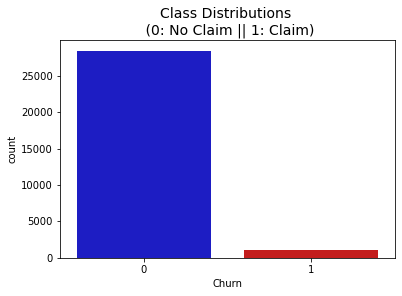

In [25]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Churn', data=HV_Data, palette=colors)
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)

In [26]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

39796

In [28]:
X_resampled_smt_tmk.describe()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rech
count,39796.0,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,...,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000
mean,109.0,501.847377,552.319846,582.633866,271.543028,303.313662,292.800101,353.810763,419.660556,394.463268,...,0.132526,0.135843,0.084682,0.098427,0.106242,1105.899663,96.620077,101.111816,90.025805,615.921070
std,0.0,442.713877,422.796786,363.988359,467.417798,499.043319,445.736975,490.178058,584.357600,443.716124,...,0.562984,0.516778,0.633183,0.722434,0.773782,884.225482,325.935420,344.369467,319.422711,476.761328
min,109.0,-810.661000,-275.799000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,109.0,231.080824,289.039153,385.228361,23.727905,31.389456,40.837500,70.811522,95.039786,121.437233,...,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,0.000000,0.000000,0.000000,323.500000
50%,109.0,404.947832,466.152964,485.330271,96.422888,111.417597,124.720000,197.112485,232.070000,255.734718,...,0.000000,0.000000,0.000000,0.000000,0.000000,765.000000,0.000000,0.000000,0.000000,510.434826
75%,109.0,660.124073,705.161301,657.010747,291.665000,344.829572,362.208086,436.602132,509.395000,512.413897,...,0.000000,0.000000,0.000000,0.000000,0.000000,1481.250000,3.203653,0.000000,0.000000,791.000000
max,109.0,11261.349000,16820.145000,19295.904000,6944.360000,8157.780000,10752.560000,6962.460000,9667.130000,13547.840000,...,16.000000,16.000000,29.000000,22.000000,41.000000,4319.000000,12916.220000,9165.600000,11166.210000,16150.000000


## Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()


In [31]:
X_resampled_smt_tmk[X_resampled_smt_tmk.columns] = scaler.fit_transform(X_resampled_smt_tmk[X_resampled_smt_tmk.columns])

In [32]:
X_resampled_smt_tmk.describe()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_Rech
count,39796.0,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,...,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000,39796.000000
mean,0.0,0.108723,0.048439,0.047236,0.039103,0.037181,0.027231,0.050817,0.043411,0.029116,...,0.008283,0.008490,0.002920,0.004474,0.002591,0.223701,0.007481,0.011032,0.008062,0.038138
std,0.0,0.036673,0.024731,0.018532,0.067309,0.061174,0.041454,0.070403,0.060448,0.032752,...,0.035186,0.032299,0.021834,0.032838,0.018873,0.213633,0.025235,0.037572,0.028606,0.029521
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.086294,0.033039,0.037185,0.003417,0.003848,0.003798,0.010170,0.009831,0.008964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.067649,0.000000,0.000000,0.000000,0.020031
50%,0.0,0.100696,0.043399,0.042282,0.013885,0.013658,0.011599,0.028311,0.024006,0.018876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.141338,0.000000,0.000000,0.000000,0.031606
75%,0.0,0.121834,0.057380,0.051023,0.042000,0.042270,0.033686,0.062708,0.052694,0.037823,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.314388,0.000248,0.000000,0.000000,0.048978
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking correlation among Features

<AxesSubplot:>

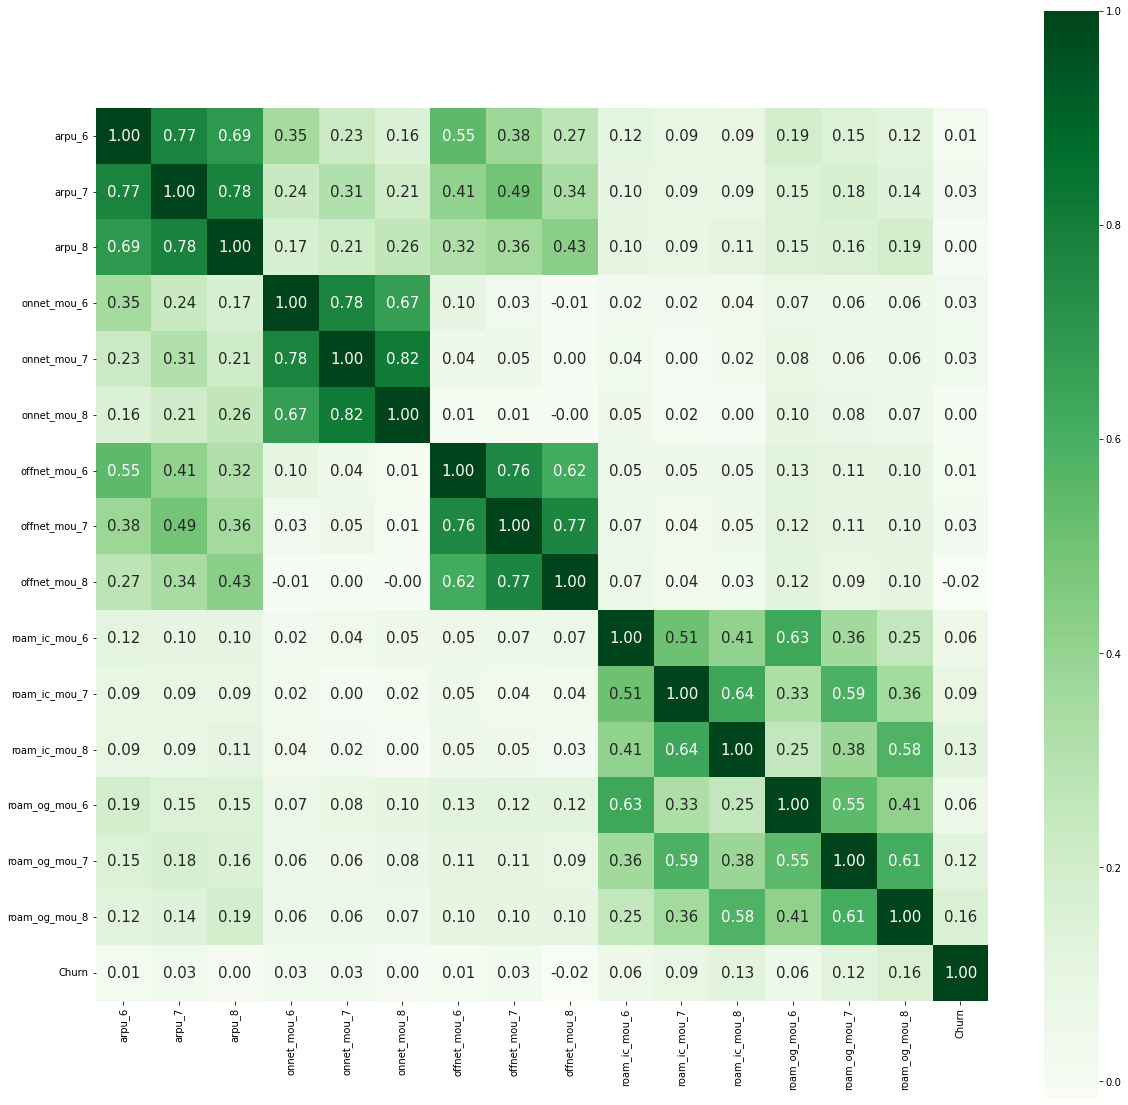

In [33]:
## Correlation for ARPU,ONNET,OFFNET,ROAM

# check correlation of continuous vars with target
conti_cols = ['arpu_6', 'arpu_7', 'arpu_8',
              'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
              'offnet_mou_6','offnet_mou_7','offnet_mou_8',
              "roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8",
              "roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","Churn"
             ]

# Finding out the correlation between the features
conti_cols_corr = HV_Data[conti_cols].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

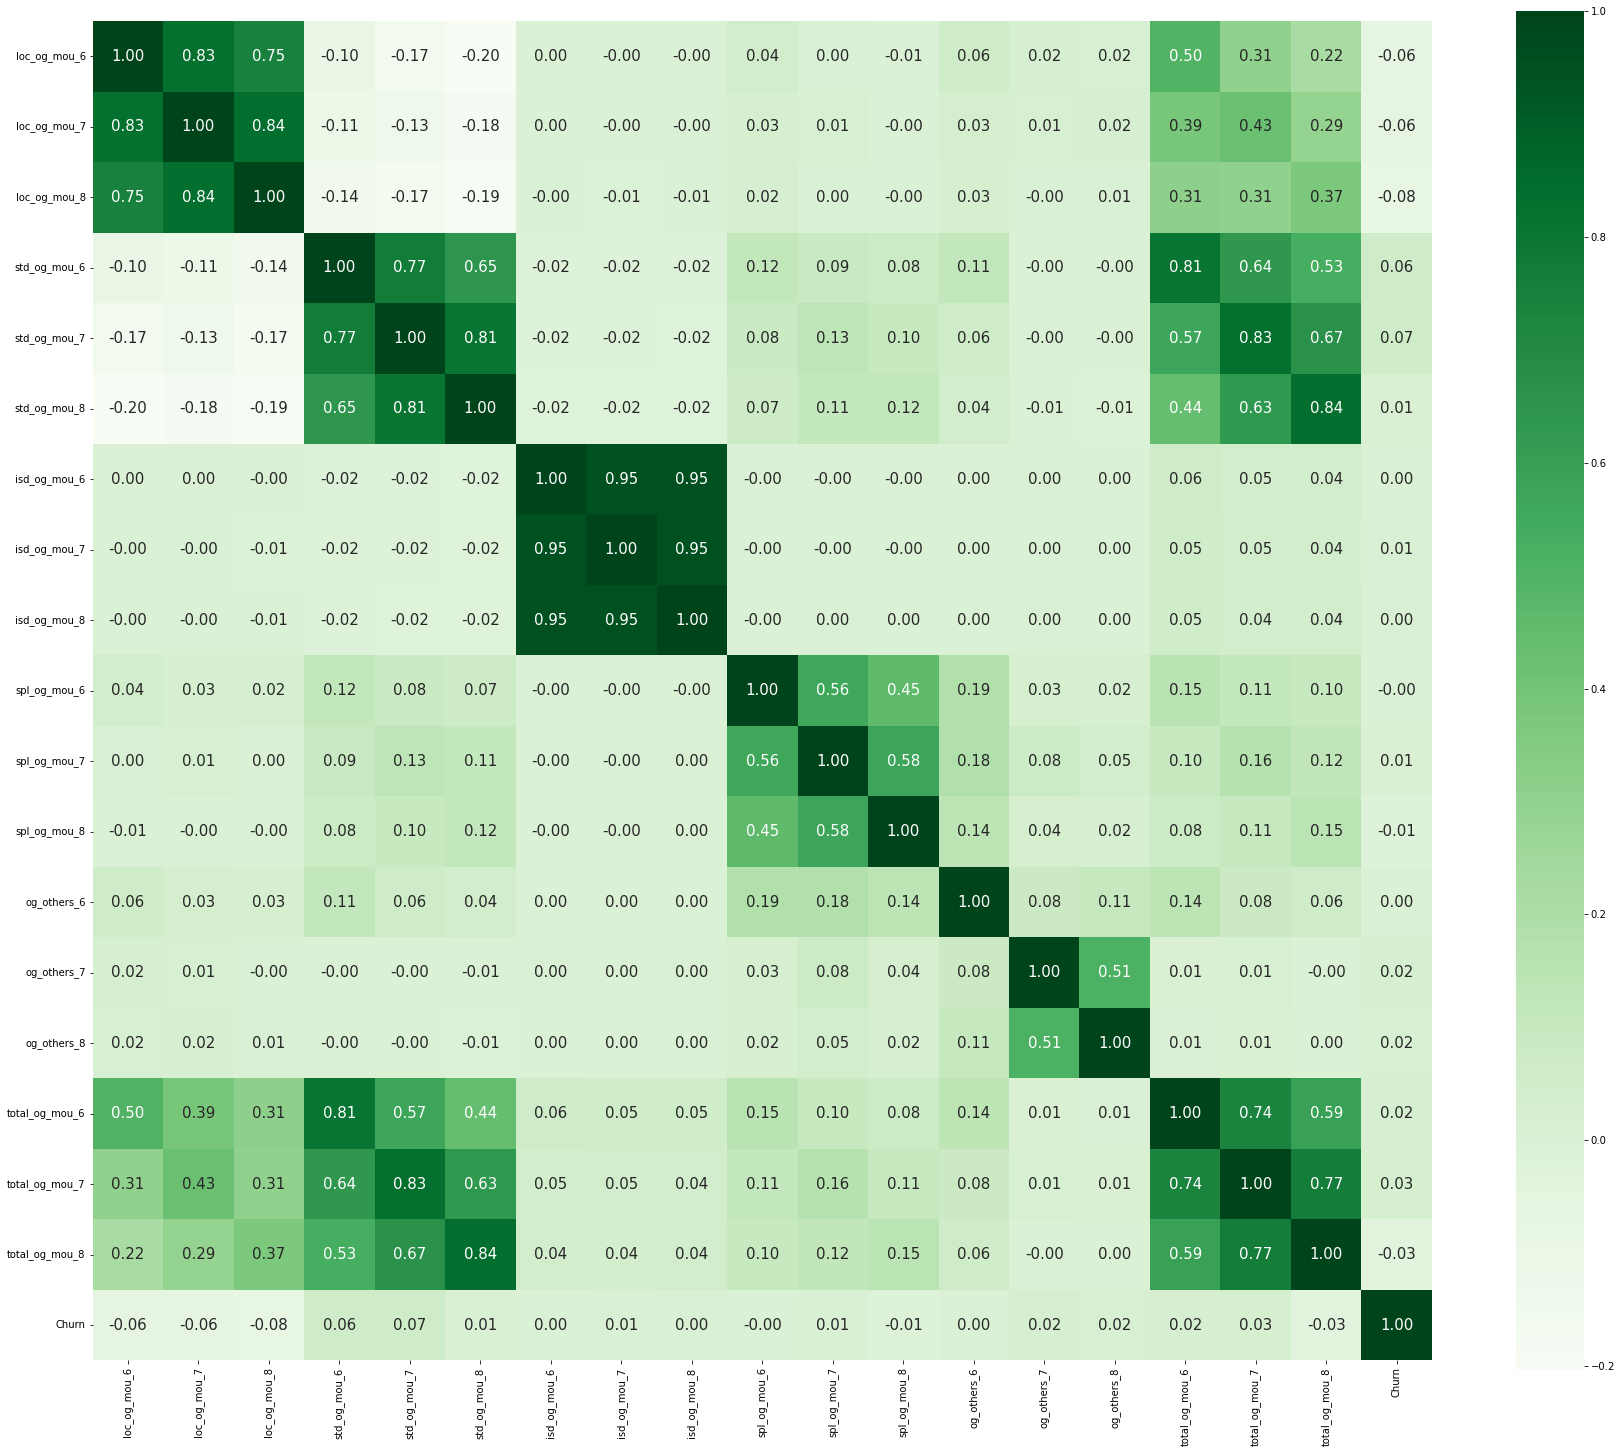

In [34]:
## Correlation for Outgoing Calls

# check correlation of continuous vars with target
conti_cols = ["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8",
              "std_og_mou_6","std_og_mou_7","std_og_mou_8",
              "isd_og_mou_6","isd_og_mou_7","isd_og_mou_8",
              "spl_og_mou_6","spl_og_mou_7","spl_og_mou_8",
              'og_others_6','og_others_7','og_others_8',
              "total_og_mou_6","total_og_mou_7","total_og_mou_8","Churn"
             ]

# Finding out the correlation between the features
conti_cols_corr = HV_Data[conti_cols].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(30,25))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

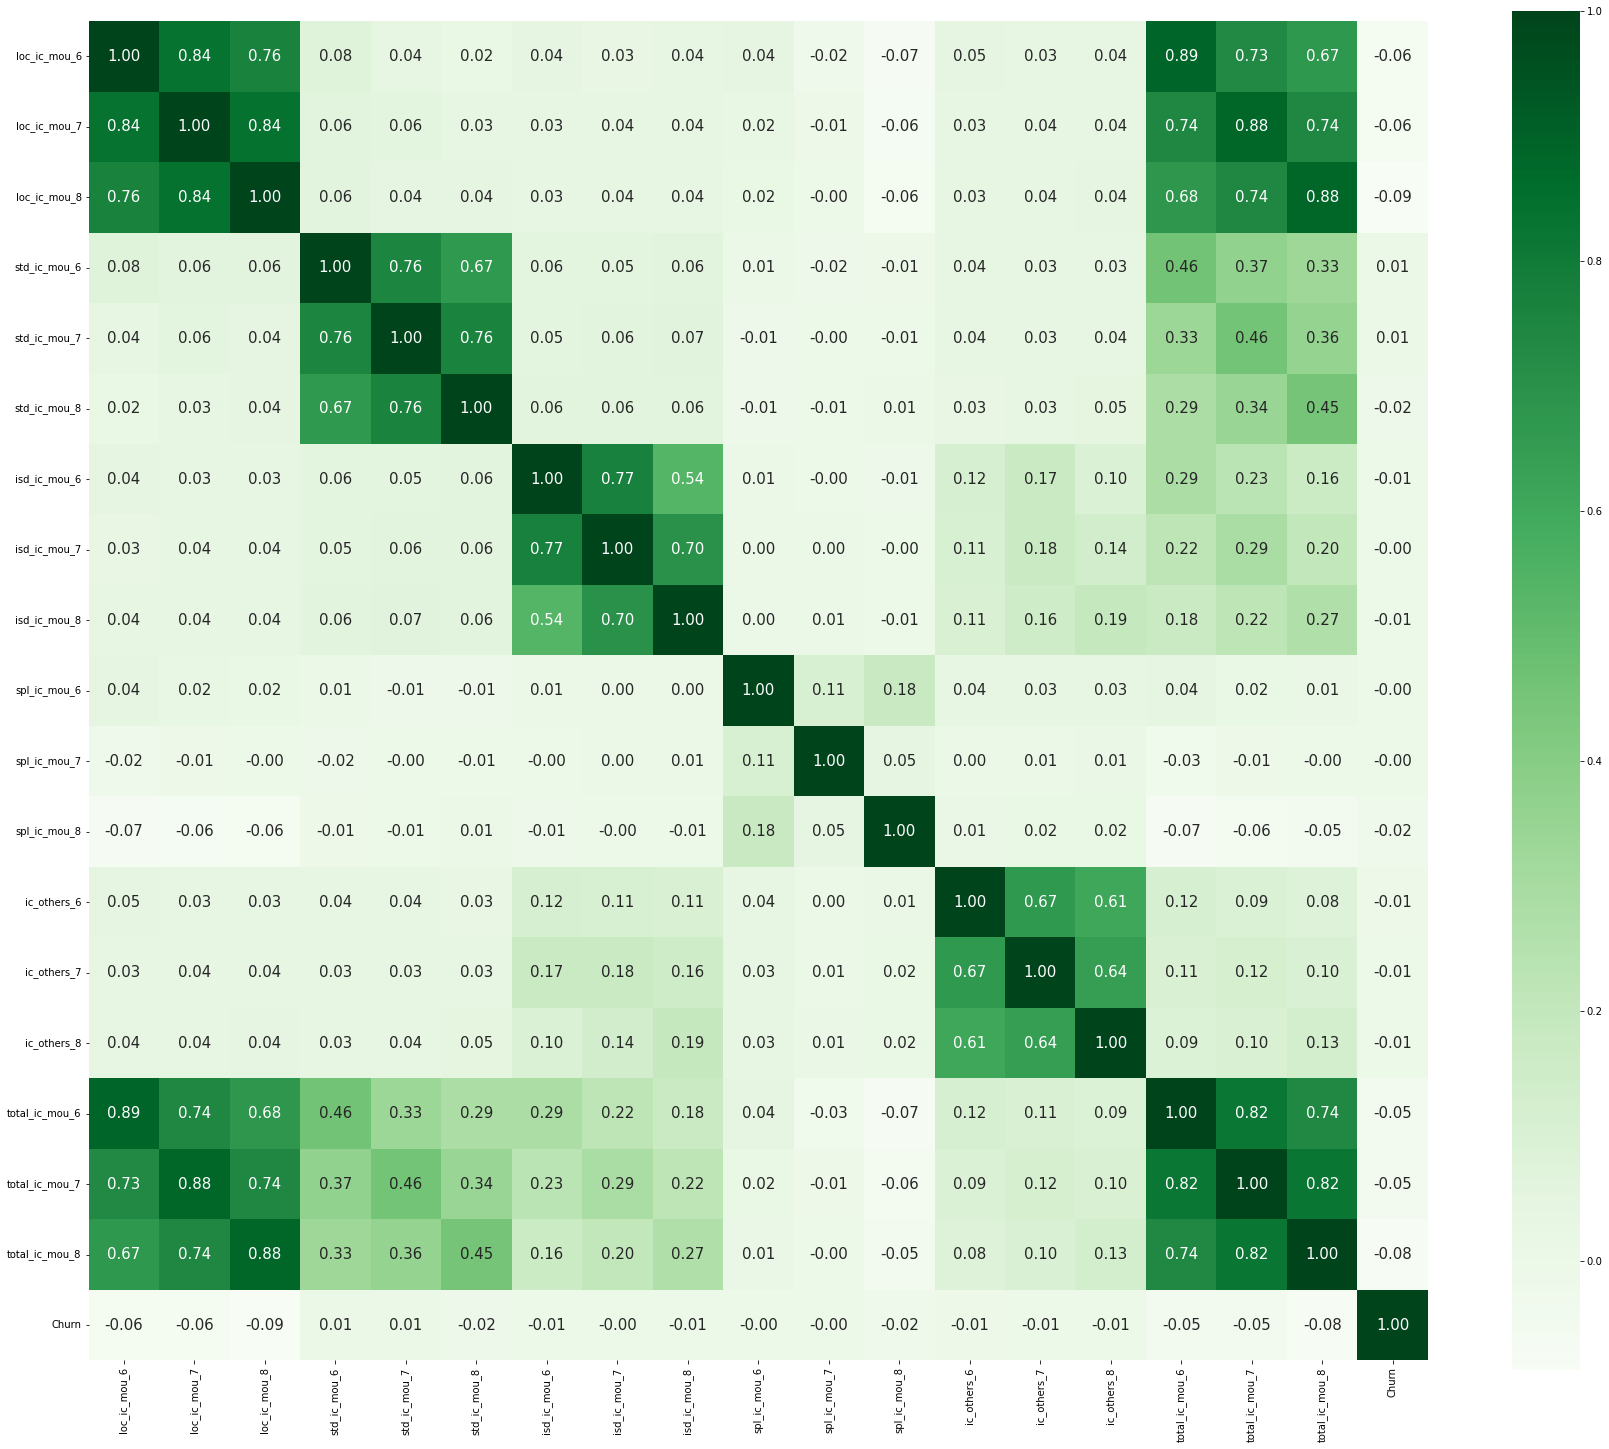

In [35]:
## Correlation for Incoming Calls

# check correlation of continuous vars with target
conti_cols = ["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8",
              "std_ic_mou_6","std_ic_mou_7","std_ic_mou_8",
              "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8",
              "spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8",
              'ic_others_6','ic_others_7','ic_others_8',
              "total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","Churn"
             ]

# Finding out the correlation between the features
conti_cols_corr = HV_Data[conti_cols].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(30,25))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

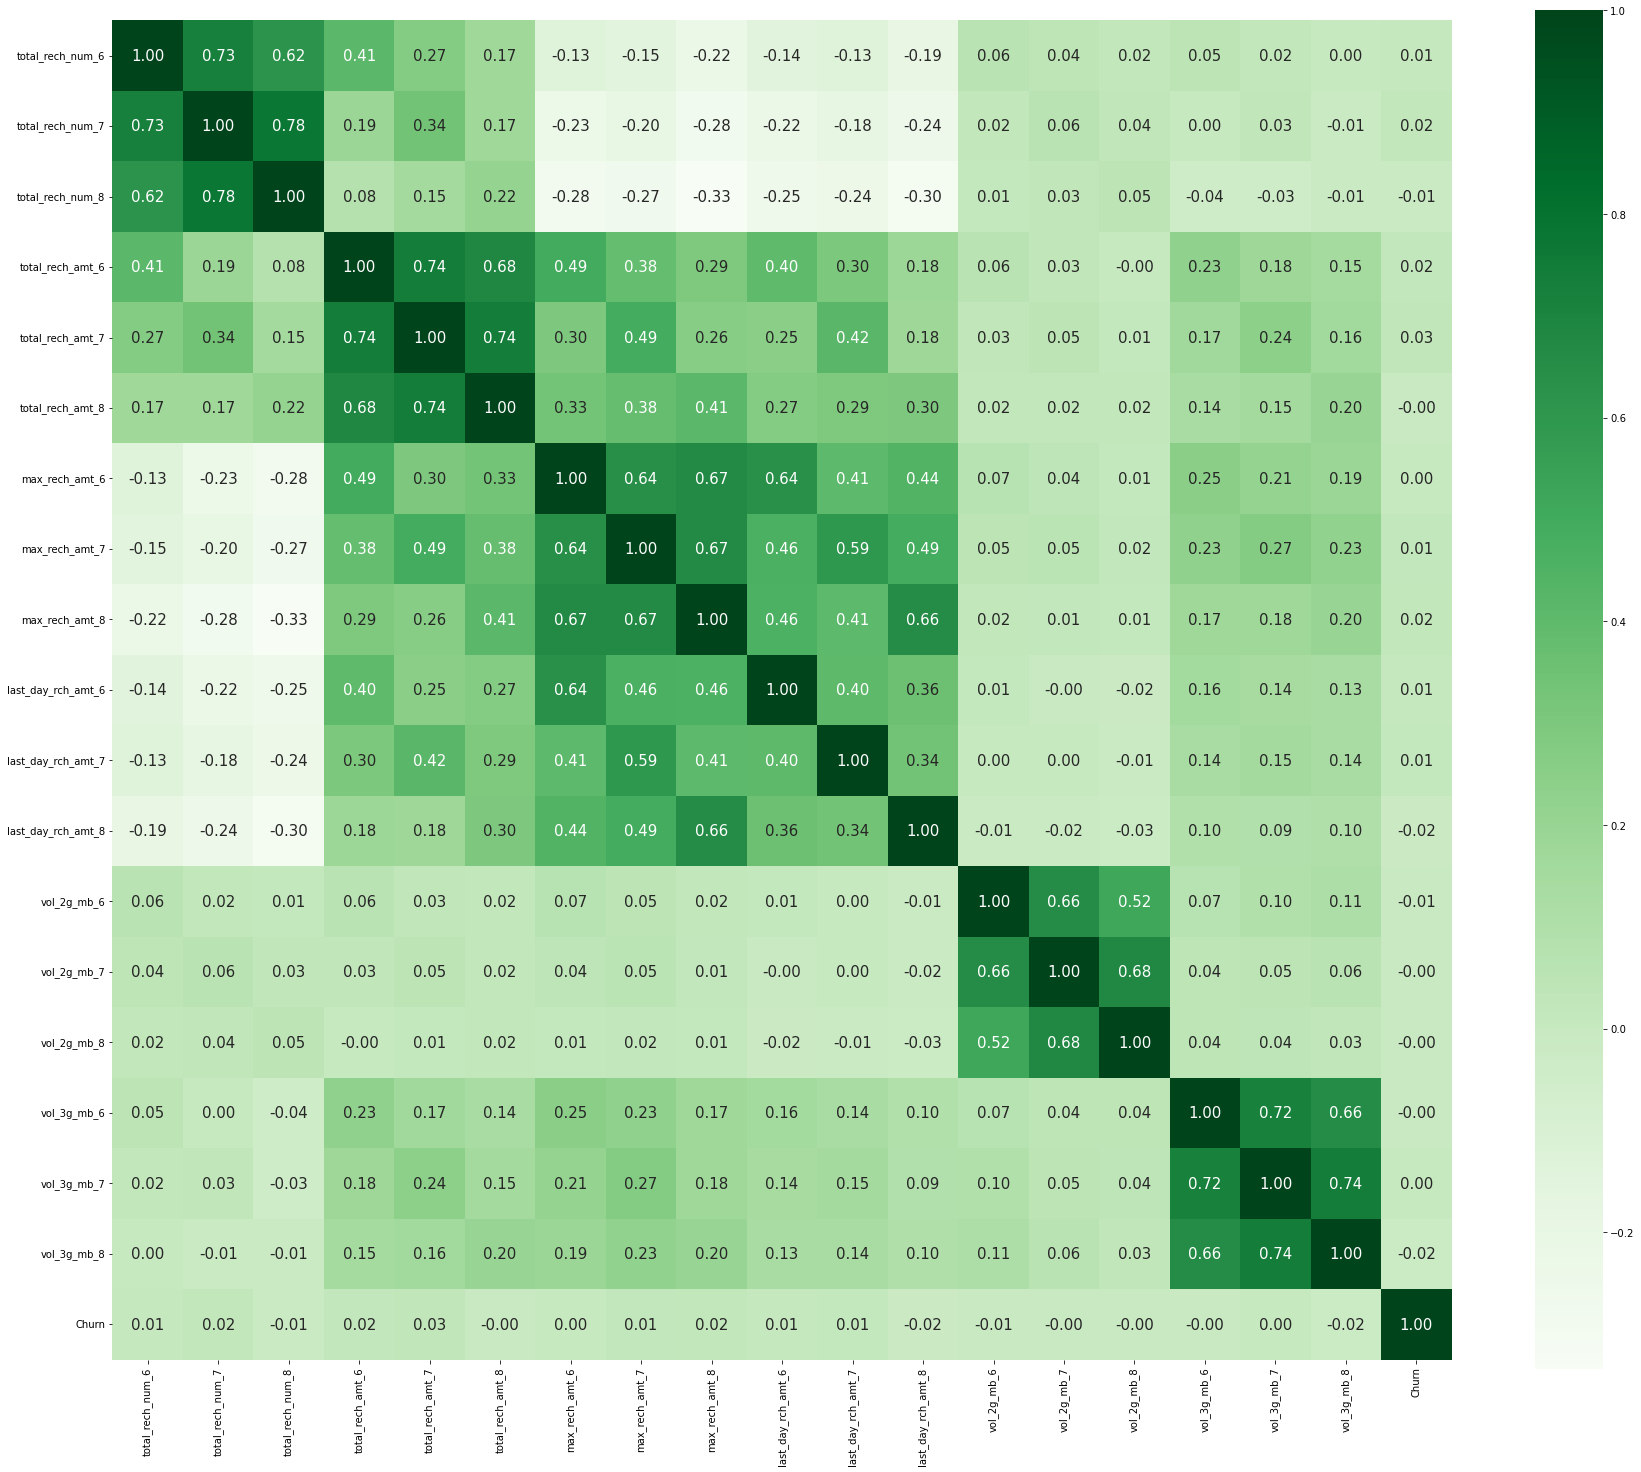

In [36]:
## Correlation for Recharge

# check correlation of continuous vars with target
conti_cols = ["total_rech_num_6","total_rech_num_7","total_rech_num_8",
              "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8",
              "max_rech_amt_6","max_rech_amt_7","max_rech_amt_8",
              "last_day_rch_amt_6","last_day_rch_amt_7","last_day_rch_amt_8",
              "vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8",
              "vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
              "Churn"
             ]

# Finding out the correlation between the features
conti_cols_corr = HV_Data[conti_cols].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(30,25))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

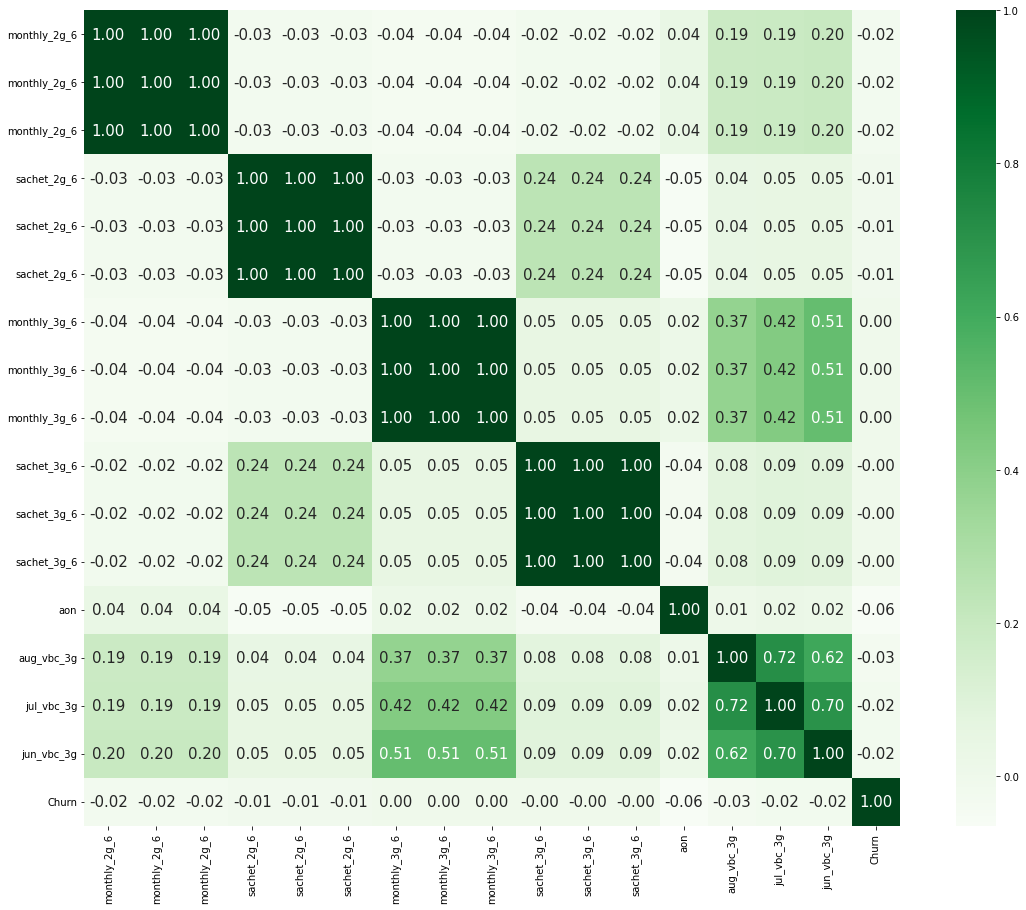

In [37]:
## Correlation for Package

# check correlation of continuous vars with target
conti_cols = ["monthly_2g_6","monthly_2g_6","monthly_2g_6",
              "sachet_2g_6","sachet_2g_6","sachet_2g_6",
              "monthly_3g_6","monthly_3g_6","monthly_3g_6",
              "sachet_3g_6","sachet_3g_6","sachet_3g_6",
              "aon","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g",
              "Churn"
             ]

# Finding out the correlation between the features
conti_cols_corr = HV_Data[conti_cols].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(conti_cols_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Using Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [44]:
rf.oob_score_

0.9779374811538848

## Hyperparamter Tuning using Randomised Search CV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [48]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [49]:
model_rcv.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [50]:
model_rcv.best_score_

0.9389892640738559

In [51]:
rf_best = model_rcv.best_estimator_

In [52]:
rf_best

RandomForestClassifier(max_depth=16, max_features=15, min_samples_leaf=20,
                       n_estimators=60, oob_score=True, random_state=42)

In [54]:
rf_best.feature_importances_

array([0.00000000e+00, 4.97959718e-03, 3.75026995e-03, 4.19306940e-03,
       5.63181884e-03, 4.66831313e-03, 7.15966333e-03, 4.16809098e-03,
       4.01347751e-03, 1.11935935e-02, 5.36379737e-03, 1.45245597e-02,
       1.91295352e-01, 7.37136511e-03, 1.66496124e-02, 2.23196346e-01,
       6.93773099e-03, 7.69643694e-03, 3.21107254e-02, 4.57437450e-03,
       6.34511753e-03, 6.34776349e-03, 4.26822763e-03, 2.33238543e-03,
       2.73373434e-03, 6.71964215e-03, 1.94797430e-02, 1.21906972e-02,
       6.02321070e-03, 2.92876062e-06, 9.42424663e-04, 5.83703248e-03,
       6.96871740e-03, 2.20036782e-02, 6.01501644e-03, 5.84463455e-03,
       4.49289265e-02, 3.36659023e-03, 3.81013596e-03, 5.79012135e-03,
       6.78105267e-03, 8.82291622e-03, 2.49441004e-02, 1.27339756e-02,
       8.53041842e-03, 1.47141131e-03, 5.59573315e-03, 9.41727544e-03,
       4.65390987e-03, 2.19635309e-03, 3.77408325e-03, 3.57734979e-03,
       2.92374336e-03, 2.90979602e-03, 6.21215015e-03, 3.83784860e-03,
      

In [56]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt_tmk.columns,
    "Imp": rf_best.feature_importances_
})

In [60]:
Var_Impact_Churn = imp_df.sort_values(by="Imp", ascending=False)[:15]

In [67]:
Var_Impact_Churn["Varname"].to_list()

['roam_og_mou_8',
 'roam_ic_mou_8',
 'loc_ic_mou_8',
 'last_day_rch_amt_8',
 'loc_og_mou_8',
 'total_ic_mou_8',
 'total_og_mou_8',
 'spl_og_mou_7',
 'roam_og_mou_7',
 'aon',
 'roam_ic_mou_7',
 'spl_ic_mou_6',
 'spl_og_mou_8',
 'max_rech_amt_8',
 'offnet_mou_8']

## Model Evaluation

In [74]:
## Perfromance on Train Set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_train_pred = rf_best.predict(X_resampled_smt_tmk)
accuracy_score(y_resampled_smt_tmk, y_train_pred)

0.9614031560960901

In [75]:
## Classification report
print(classification_report(y_resampled_smt_tmk, y_train_pred))



              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19898
           1       0.95      0.97      0.96     19898

    accuracy                           0.96     39796
   macro avg       0.96      0.96      0.96     39796
weighted avg       0.96      0.96      0.96     39796



In [77]:
## Performance on Test Set

y_test_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_test_pred)
print(classification_report(y_resampled_smt_tmk, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19898
           1       0.95      0.97      0.96     19898

    accuracy                           0.96     39796
   macro avg       0.96      0.96      0.96     39796
weighted avg       0.96      0.96      0.96     39796



## Factor Most affecting the CHurn

1. Roaming calls in the month of Aug
2.Local Incoming and Outgoing calls in Aug
3. Last recharge in Aug

## To reduce the Churn of customer 

1. Roaming calls to be monitored continuously and service provided
2. In the Action phase only customer reducing the calls to be given attractive offer on their next recharges
3. Last recharge amount to be compare to the last 3 months average